In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Midterm Project for DATA 11800 - Winter 2024 (Due Feb. 16th)

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing (including any use of generative AI). The score will be based on:
-  Clarity and soundness of the arguments and conclusions;
-  Use of data to back up arguments and analysis quality;  
-  Insightfulness of the results;
-  Quality of the data vizualizations, summaries used, and overall presentation. Make sure you use headings, captions for figures and tables etc. When you interpret a graph or data from a table, you should clearly specify which figure/table you refer to.


### The Data

The data you will be exploring in this project comes from "Monitoring the Future: A Continuing Study of American Youth", 

*"This survey of 12th-grade students is part of a series that explores changes in important values, behaviors, and lifestyle orientations of contemporary American youth. Students are randomly assigned to complete one of six questionnaires, each with a different subset of topical questions, but all containing a set of "core" questions on demographics and drug use."*

The data can be downloaded from the link below
https://www.icpsr.umich.edu/web/ICPSR/studies/38882

Click on 'Download' and then 'Delimited'.

You will have to make an account and agree to the corresponding terms and conditions to have access to the data. Note you will get a folder called "ICPSR_38882". This folder contains the codebook that describes the study and the variables in detail. This folder is also how you will get the data itself.

We put together a smaller list of variables and their column names and descriptions available on the canvas midterm assignment. The variables in the excel sheet are a subset of the entire data, but if your interests lie in exploring the full dataset, or you want to explore different variables, you are not limited to just the variables in the short list.


You can (but are not required to) use any additional data you can find to get insight into this issue, but you need to specify the provenance of that data in your report. For example, this is part of an ongoing study, so you could look at the data from past years.


### The Assignment

#### Report on your findings about High School Seniors

You must submit two files:

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit any additional data you used, but just indicate how you obtained it in the Notebook.

2. A report of your findings. **This report should be at most 4 pages long including references.** Use data visualization and data summaries to justify your conclusions. Note that the page limitation means you will not show all analyses you will make - select carefully what you think is most relevant.

The report should address the following points:

A.  **Introduce the dataset**.  Describe the data. Where does it come from? Why was it collected (what are the researchers interested in studying)? Was it an experiment? A retrospective observational study? A prospective observational study? How many variables are there in the full dataset? List a few. How many observations (i.e. rows)? How many students participated? Describe the sampling process. Using what you have learned about data collection is this a biased or unbiased sample? Why?

B.  **Characteristics of sample**. Describe the sample of students and high schools in the dataset.  Summarize the distributions of 3 or more of the characteristics (variables) of the people and households.  Some interesting variables you may consider include: Days missed from school, Career Outlook, Grade Point Average, Drinking or Drug Usage, etc. You should include a graph or table for each distribution. You should create at least one graph and at least one table (DataFrame).

C. **Relationships between variables.**  Now, shift focus from distributions of single variables to relationships between variables. You should investigate at least 2 of the student characteristics (race, sex, lifestyle, etc.) and at least two opinion questions (agree/disagree, satisfaction level, etc.).  For example, do you find evidence that outlook of the future differs by gender, or parent education level affects grade point average. Include two or more graphs or tables here. Describe any associations you find. During your exploration you should create at least one new column in the DataFrame based on existing variables in the dataset. To do this, you should write a function (or more than one if you like) and apply it to one or more columns of the dataset.

D. **Provide context**  To the best of your knowledge, what do the relationships you discovered imply? Do you think the associations are causal? Provide a potential explanation for the associations (or lack thereof) you observe. What are some potential confounders and colliders that may explain the relationships? Identify one potential confounder and one potential collider for a chosen relationship. What are some questions that you would like to answer but are unable to with the current data set alone?  What data would you need to be able to answer them?

E. **Conclusion/Self-Assessment** What did you learn from exploring this dataset?

Your submission is to be uploaded to Canvas and Gradescope. **If you do not submit both a report and a ipynb code notebook, you will automatically recieve a deduction of 20 points from your submission.**
There are some minimum requirements for your submission:

1. Upload your report in PDF or DOC format to Canvas
2. Upload the jupyter notebook containing your analysis code to Gradescope, in .ipynb format.
3. The report should be 4 pages maximum, including bibliography, tables and figures.
4. If your report uses outside results and/or data, proper citations must be provided.
    


You may use the following code to help you load in the data.

In [2]:
#we need to read a tab separated values (tsv file)
core_df = pd.read_csv("../Midterm_Data/DS0001/38882-0001-Data.tsv", sep='\t')
DS2 = pd.read_csv("../Midterm_Data/DS0002/38882-0002-Data.tsv", sep='\t')
DS3 = pd.read_csv("../Midterm_Data/DS0003/38882-0003-Data.tsv", sep='\t')
DS4 = pd.read_csv("../Midterm_Data/DS0004/38882-0004-Data.tsv", sep='\t')
DS6 = pd.read_csv("../Midterm_Data/DS0006/38882-0006-Data.tsv", sep='\t')

A few notes, hints, that may be helpful as you are working with this data.
1. Take a look at the codebook. It has a lot of information about the survey itself and the variable names. We have put together a spreadsheet of selected variables to make it easier to see the variables present.
2. The Core data contain questions that everyone in the survey answered. The other forms: DS2, DS3, DS4, DS6 were answered by a subset of people. If you are interested in a variable in the Core data and how that variable interacts with a variable in DS3, then you can merge on Respondent ID to cross classify those variables. (please see the codebook for more info here)
3. The variable outcomes are encoded as numeric values. To see the corresponding outputs, you will need to look at the spreadsheet or the codebook, including how missing data was handled in the survey.
4. There are numerous variables that are not in the spreadsheet but included in the survey. If you are interested you can include any variable of interest from the survey.

# Section A
Written in data report - and the source of information was from the website and the codebook.

# Section B
Included four characteristics of the high school sample both in bar chart and table format.

In [3]:
# Grades for High School Seniors - identifier 'V2179', core_df
number_to_option_1 = {-9: "Missing Data", 9:"A (93-100)", 8:"A- (90-92)", 7:"B+ (87-89)", 6:"B (83-86)", 5:"B- (80-82)", 4:"C+ (77-79)", 3:"C (73-76)", 2:"C- (70-72)", 1:"D (69 or below)"}
grades_df = pd.DataFrame(core_df['V2179'])
grades_df.columns = ['Response']
grades_df['Frequency'] = grades_df['Response']
grades_df = pd.DataFrame(grades_df.groupby('Response')['Frequency'].count())
grades_df['Grade'] = grades_df.index.map(number_to_option_1)
grades_df.set_index('Grade', inplace=True)
grades_df

,Frequency
Grade,
Missing Data,854
D (69 or below),152
C- (70-72),226
C (73-76),316
C+ (77-79),607
B- (80-82),744
B (83-86),1108
B+ (87-89),1356
A- (90-92),1914


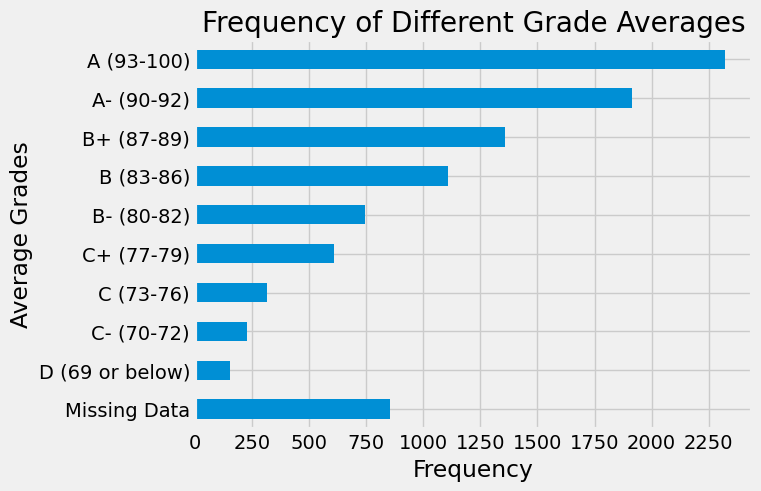

In [4]:
# Plotting High School Senior Grades as a Bar Graph
grades_df.plot.barh(legend=False)
plt.title('Frequency of Different Grade Averages')
plt.xlabel('Frequency')
plt.ylabel('Average Grades')
plt.xticks(range(0, max(grades_df['Frequency']), 250))
plt.show()

In [5]:
# Satisfaction with Self, Parents, and Friends in DS2 - identifiers 'V1646', 'V1647', 'V1648'
number_to_option_2 = {-9: "Missing Data", 7:"Completely satisfied", 6:"Quite satisfied", 5:"Somewhat satisfied", 4:"Neutral", 3:"Somewhat dissatisfied", 2:"Quite dissatisfied", 1:"Completely dissatisfied"}
self_sat_df = pd.DataFrame(DS2['V1648'])
parent_sat_df = pd.DataFrame(DS2['V1647'])
friends_sat_df = pd.DataFrame(DS2['V1646'])

self_sat_df.columns = ['Response']
self_sat_df['Satisfaction with Self'] = self_sat_df['Response']
self_sat_df = pd.DataFrame(self_sat_df.groupby('Response')['Satisfaction with Self'].count())

parent_sat_df.columns = ['Response']
parent_sat_df['Satisfaction with Parents'] = parent_sat_df['Response']
parent_sat_df = pd.DataFrame(parent_sat_df.groupby('Response')['Satisfaction with Parents'].count())

friends_sat_df.columns = ['Response']
friends_sat_df['Satisfaction with Friends'] = friends_sat_df['Response']
friends_sat_df = pd.DataFrame(friends_sat_df.groupby('Response')['Satisfaction with Friends'].count())

all_sat_df = pd.merge(self_sat_df, parent_sat_df, left_index=True, right_index=True)
all_sat_df = pd.merge(all_sat_df, friends_sat_df, left_index=True, right_index=True)
all_sat_df['Satisfaction'] = all_sat_df.index.map(number_to_option_2)
all_sat_df.set_index('Satisfaction', inplace=True)

all_sat_df

,Satisfaction with Self,Satisfaction with Parents,Satisfaction with Friends
Satisfaction,,,
Missing Data,75,45,50
Completely dissatisfied,50,40,15
Quite dissatisfied,91,57,22
Somewhat dissatisfied,126,89,40
Neutral,214,187,122
Somewhat satisfied,325,209,169
Quite satisfied,384,453,514
Completely satisfied,271,456,604


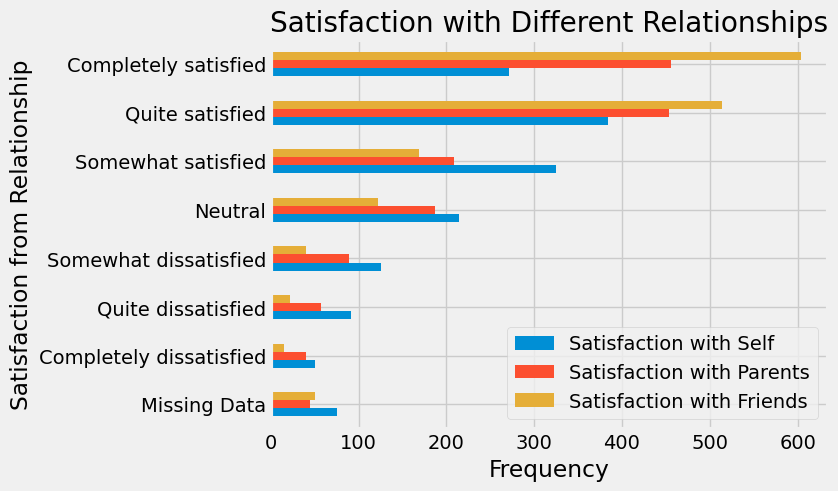

In [6]:
# Plotting Satisfaction with Relationships as a Bar Graph
all_sat_df.plot.barh()
plt.title('Satisfaction with Different Relationships')
plt.xlabel('Frequency')
plt.ylabel('Satisfaction from Relationship')
plt.show()

In [7]:
# Marijuana and Hashish Use in Lifetime - identifier 'V2115', in core_df
number_to_option_3 = {-9: "Missing Data", 1:"0 Occasions", 2:"1-2 Occasions", 3:"3-5 Occasions", 4:"6-9 Occasions", 5:"10-19 Occasions", 6:"20-39 Occasions", 7:"40 or More"}
mar_use_df = pd.DataFrame(core_df['V2115'])
mar_use_df.columns = ['Response']
mar_use_df['Frequency'] = mar_use_df['Response']
mar_use_df = pd.DataFrame(mar_use_df.groupby('Response')['Frequency'].count())
mar_use_df['Marijuana or Hashish Use'] = mar_use_df.index.map(number_to_option_3)
mar_use_df.set_index('Marijuana or Hashish Use', inplace=True)

mar_use_df

,Frequency
Marijuana or Hashish Use,
Missing Data,753
0 Occasions,5511
1-2 Occasions,796
3-5 Occasions,470
6-9 Occasions,318
10-19 Occasions,370
20-39 Occasions,294
40 or More,1087


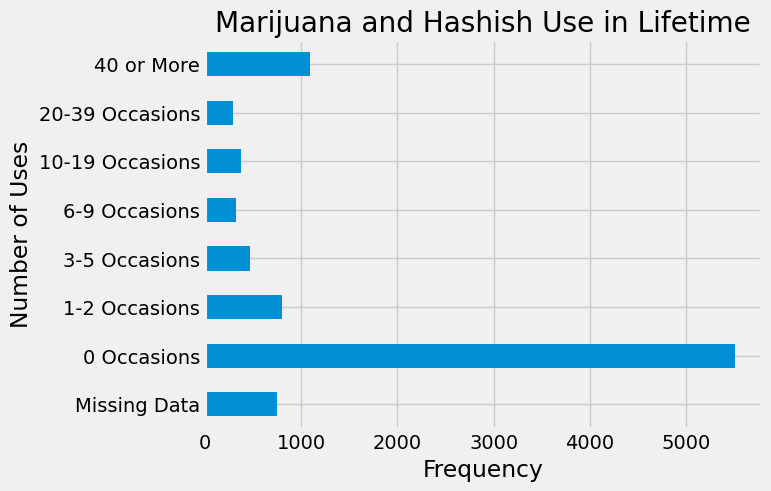

In [8]:
# Plotting Marijuana and Hashish Use in Lifetime as bar plot
mar_use_df.plot.barh(legend=False)
plt.title('Marijuana and Hashish Use in Lifetime')
plt.xlabel('Frequency')
plt.ylabel('Number of Uses')
plt.show()

In [9]:
# Overall Happiness these Days - identifier 'V3208'
happiness_df = pd.DataFrame(DS4['V3208'])
number_to_option_4 = {-9: "Missing Data", 3:"Very happy", 2:"Pretty happy", 1:"Not too happy"}
happiness_df.columns = ['Response']
happiness_df['Frequency'] = happiness_df['Response']
happiness_df = pd.DataFrame(happiness_df.groupby('Response')['Frequency'].count())
happiness_df['Happiness'] = happiness_df.index.map(number_to_option_4)
happiness_df.set_index('Happiness', inplace=True)

happiness_df

,Frequency
Happiness,
Missing Data,10
Not too happy,352
Pretty happy,1009
Very happy,222


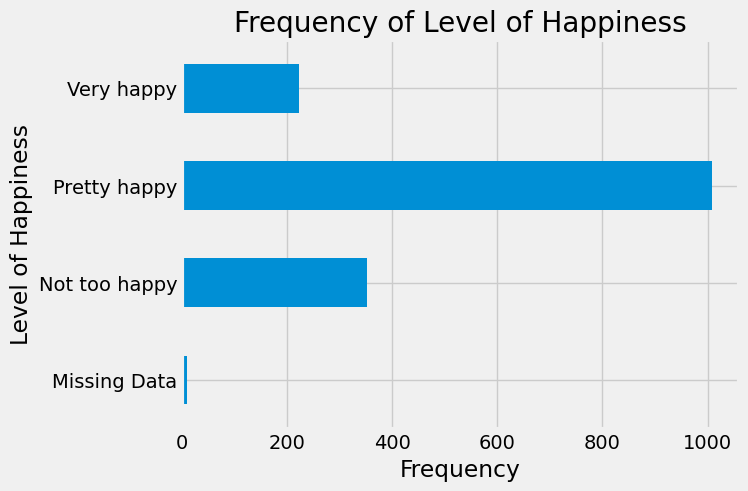

In [10]:
# Plotting Happiness these Days as a Bar Graph
happiness_df.plot.barh(legend=False)
plt.ylabel('Level of Happiness')
plt.xlabel('Frequency')
plt.title('Frequency of Level of Happiness')
plt.show()

# Section C
Exploring the relationships between the four variables from Section B, creating two graphs and two bar graphs.
Created a lambda function that calculates the percentage of grades that are A or A- of all the grades in that category.

In [11]:
# Question 1 to Explore: How does satisfaction with friendships impact student performance (grades)?
core_DS2 = pd.merge(core_df, DS2, on='RESPONDENT_ID')
new_core_DS2 = core_DS2[(core_DS2['V2179'] == 9) | (core_DS2['V2179'] == 8)]
new_core_DS2 = new_core_DS2[new_core_DS2['V2179'] != -9]
new_core_DS2 = new_core_DS2[new_core_DS2['V1646'] != -9]

friends_to_grades = pd.DataFrame(new_core_DS2.groupby('V1646')['V2179'].count())
friends_to_grades.columns = ['A or A- Grades']
friends_to_grades['Total Grades'] = core_DS2.groupby('V1646')['V2179'].count()
friends_to_grades['Friendship Satisfaction'] = friends_to_grades.index.map(number_to_option_2)
friends_to_grades.set_index('Friendship Satisfaction', inplace=True)

# Creating new column using lambda function
friends_to_grades['Percentage of A/A- Grades'] = friends_to_grades.apply(lambda row: row['A or A- Grades'] / row['Total Grades'] * 100, axis=1)

friends_to_grades

,A or A- Grades,Total Grades,Percentage of A/A- Grades
Friendship Satisfaction,,,
Completely dissatisfied,4,15,26.666667
Quite dissatisfied,7,22,31.818182
Somewhat dissatisfied,16,40,40.000000
Neutral,30,122,24.590164
Somewhat satisfied,81,169,47.928994
Quite satisfied,227,514,44.163424
Completely satisfied,278,604,46.026490


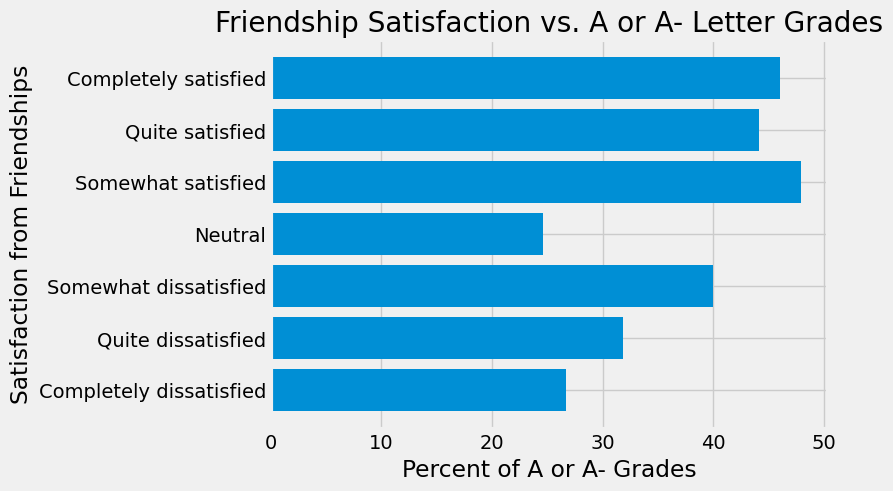

In [12]:
# Plotting Friendship Satisfaction vs Student Performance
plt.barh(friends_to_grades.index, friends_to_grades['Percentage of A/A- Grades'])
plt.xlabel('Percent of A or A- Grades')
plt.ylabel('Satisfaction from Friendships')
plt.title('Friendship Satisfaction vs. A or A- Letter Grades')
plt.show()

In [13]:
#Question 2 to Explore: How does lifetime drug use (such as marijuana or hashish) affect overall happiness for 12th graders?
core_DS4 = pd.merge(core_df, DS4, on='RESPONDENT_ID')

new_core_DS4 = core_DS4[(core_DS4['V3208'] == 3) | (core_DS4['V3208'] == 2)]
new_core_DS4 = new_core_DS4[new_core_DS4['V3208'] != -9]
new_core_DS4 = new_core_DS4[new_core_DS4['V2115'] != -9]

drugs_to_happy = pd.DataFrame(new_core_DS4.groupby('V2115')['V3208'].count())
drugs_to_happy.columns = ['Happy Students']
drugs_to_happy['All Students'] = core_DS4.groupby('V2115')['V3208'].count()
drugs_to_happy['Marijuana or Hashish Use'] = drugs_to_happy.index.map(number_to_option_3)
drugs_to_happy.set_index('Marijuana or Hashish Use', inplace=True)

drugs_to_happy['Percent Happy'] = drugs_to_happy.apply(lambda row: row['Happy Students'] / row['All Students'] * 100, axis=1)

drugs_to_happy

,Happy Students,All Students,Percent Happy
Marijuana or Hashish Use,,,
0 Occasions,730,914,79.868709
1-2 Occasions,109,144,75.694444
3-5 Occasions,68,85,80.000000
6-9 Occasions,39,52,75.000000
10-19 Occasions,43,55,78.181818
20-39 Occasions,33,45,73.333333
40 or More,121,178,67.977528


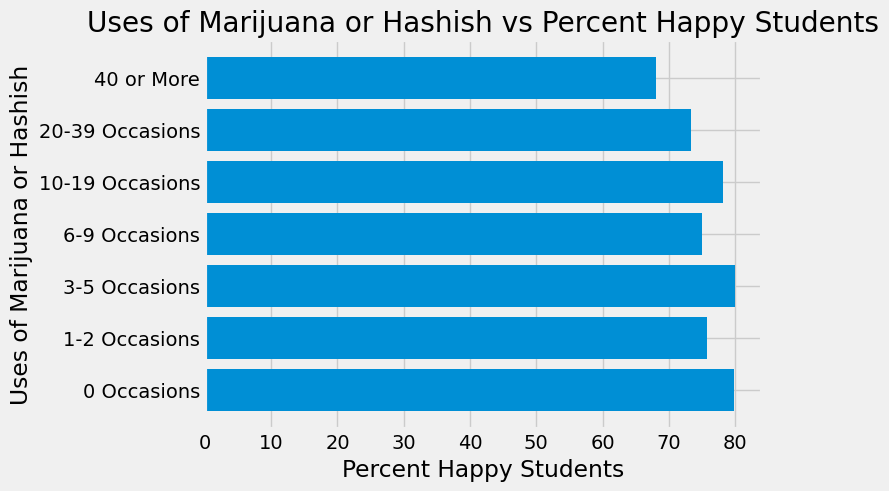

In [14]:
plt.barh(drugs_to_happy.index, drugs_to_happy['Percent Happy'])
plt.xlabel('Percent Happy Students')
plt.ylabel('Uses of Marijuana or Hashish')
plt.title('Uses of Marijuana or Hashish vs Percent Happy Students')
plt.show()

# Sections D and E
Covered in Data Report using findings from Sections B and C.